## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate

## Read data from CSV

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Jordwy/Data-Mining/refs/heads/main/Applied%20Practice%205%20-%20Data.csv')

## Seperate Data into Features and Class labels 

In [3]:
def pre_process(df: pd.DataFrame):

    # Seperate class from features
    features = df.drop('edible', axis=1)
    class_labels = df['edible']

    # Shuffle data
    features = features.sample(frac=1, random_state=1234)
    class_labels = class_labels.sample(frac=1, random_state=1234)

    # Seperate into test and train
    n = int(features.shape[0] * 0.8) # get 80% index num
    train_features, train_class_labels  = features.iloc[:n], class_labels.iloc[:n]
    test_features,  test_class_labels   = features.iloc[n:], class_labels.iloc[n:]

    return train_features, train_class_labels, test_features, test_class_labels




# Task 3 - Training a decision tree with Scikit-learn

**Exercise 1**: Create a function that takes dataframe as an input argument and converts all the
columns with “object” datatype, into categorical series with appropriate codes. 

*Hint: To convert a column of “object” dtype with string values to integer values you need to first convert into an accessor object for categorical properties of the pandas Series values and then you can use the series category attributes such as “codes”.*


## Exercize 1

In [4]:
def col_convert(df:pd.DataFrame) -> pd.DataFrame:
    '''Convert all columns of dtype 'object' into catagory codes (int)'''
    
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes

    return df

In [5]:
df = col_convert(df)
train_features, train_class_labels, test_features, test_class_labels = pre_process(df)


In [6]:
classifier = DecisionTreeClassifier(random_state=1234)

In [7]:
classifier.fit(train_features, train_class_labels)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
predictions = classifier.predict(test_features)



In [9]:
test_class_labels[test_features.index]

7204    0
4795    1
7095    1
1695    0
4998    1
       ..
3276    1
7221    0
1318    0
723     0
2863    0
Name: edible, Length: 1625, dtype: int8

In [10]:
print(classification_report(test_class_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [11]:
print(confusion_matrix(test_class_labels, predictions))

[[844   0]
 [  0 781]]


In [12]:
tree_learner2 = DecisionTreeClassifier(random_state=1234)


In [16]:
# Seperate class from features
features = df.drop('edible', axis=1)
class_labels = df['edible']

# Shuffle data
feature_variables = features.sample(frac=1, random_state=1234)
class_label_variable = class_labels.sample(frac=1, random_state=1234)

eval_results = cross_validate(tree_learner2, X=features, y=class_labels, cv=10, scoring=['accuracy', 'roc_auc'])

TypeError: can only concatenate str (not "numpy.int8") to str

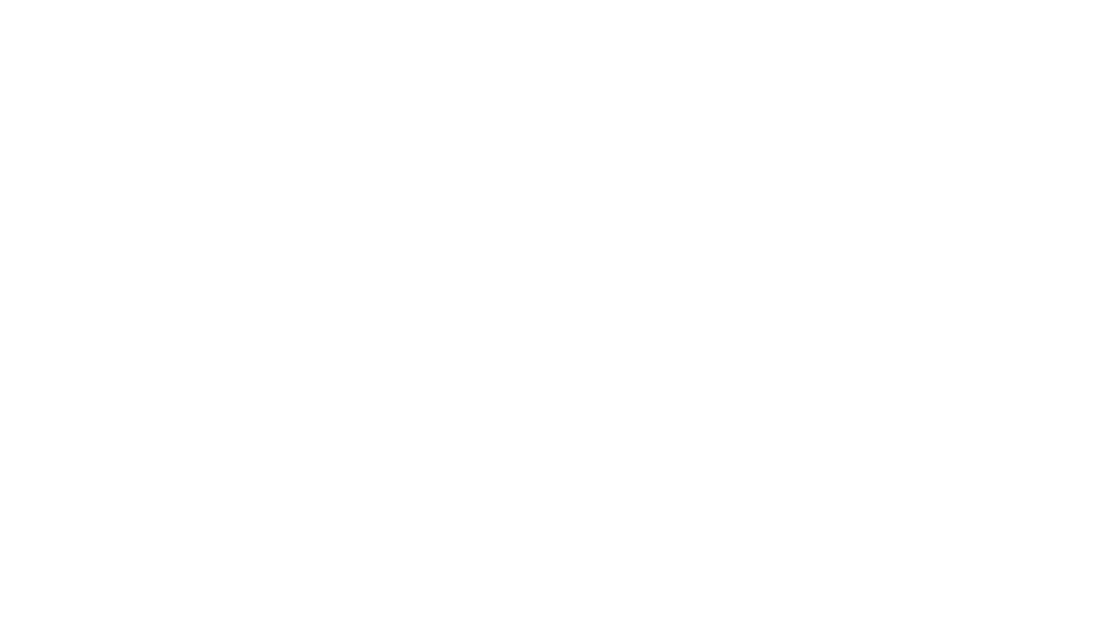

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    feature_variables, class_label_variable, test_size=0.2, random_state=42, stratify=class_label_variable
)

encoder = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), X_train.columns)],
    remainder="drop",
)

tree = DecisionTreeClassifier(random_state=42)

clf = Pipeline(steps=[("prep", encoder), ("tree", tree)])
clf.fit(X_train, y_train)

# 1) Show how the trained tree splits
plt.figure(figsize=(14, 8))
plot_tree(
    clf.named_steps["tree"],
    feature_names=clf.named_steps["prep"].get_feature_names_out(),
    class_names=clf.classes_,
    filled=True,
    max_depth=3,   # tweak/remove to see the full tree
    fontsize=6,
)
plt.tight_layout()
plt.show()

# 2) Visualise prediction quality
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Decision Tree confusion matrix")
plt.tight_layout()
plt.show()
